# Transfer Learning with Tensorflow - Fine Tuning

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-03-07 07:54:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-07 07:54:27 (58.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Food Classes: Working with 10% Data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2023-03-07 07:54:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.2MB/s    in 8.4s    

2023-03-07 07:54:54 (19.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [4]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE,
                                                                            label_mode='categorical')

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [11]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [12]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[6.35714293e+00 1.35714281e+00 0.00000000e+00]
   [5.00000000e+00 1.00000000e+00 0.00000000e+00]
   [5.14285660e+00 1.78571415e+00 0.00000000e+00]
   ...
   [5.79596806e+00 1.42345536e+00 0.00000000e+00]
   [1.05714674e+01 6.88783884e-01 0.00000000e+00]
   [1.63571777e+01 2.00003481e+00 0.00000000e+00]]

  [[6.35714293e+00 1.35714281e+00 0.00000000e+00]
   [5.00000000e+00 1.00000000e+00 0.00000000e+00]
   [5.14285660e+00 1.78571415e+00 0.00000000e+00]
   ...
   [8.67353153e+00 3.41816425e-01 0.00000000e+00]
   [1.57806635e+01 2.85727262e-01 5.10297250e-03]
   [2.18316650e+01 2.47452211e+00 9.18317065e-02]]

  [[6.35714293e+00 1.35714281e+00 0.00000000e+00]
   [5.00000000e+00 1.00000000e+00 0.00000000e+00]
   [5.14285660e+00 1.78571415e+00 0.00000000e+00]
   ...
   [1.85663986e+01 2.78571415e+00 6.17363930e-01]
   [2.68724766e+01 3.85715580e+00 1.53060448e+00]
   [3.22092094e+01 4.78571415e+00 1.56628418e+00]]

  ...

  [[1.78570557e+00 3.21429443e+00 0.00000000e+00]
   [1

## Model_0 : Model using the keras functional API

In [14]:
# Create base model using keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model so that the pre-learned patterns remain
base_model.trainable = False

# Create input layers into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# Pass the inputs to the base_model
x = base_model(inputs)
print(f"shape after base_model : {x.shape}")

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooling2D() : {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax", name="output_layer")(x)

# Combining the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data_10_percent,
                        validation_steps=int(0.25*len(test_data_10_percent)),
                        callbacks=[create_tensorboard_callback("transfer_learning","10_percent_feature_extract")])


shape after base_model : (None, 7, 7, 1280)
shape after GlobalAveragePooling2D() : (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230307-082513
Epoch 1/5
24/24 [==============================] - 23s 239ms/step - loss: 1.9131 - accuracy: 0.4067 - val_loss: 1.3467 - val_accuracy: 0.7303
Epoch 2/5
24/24 [==============================] - 4s 150ms/step - loss: 1.1145 - accuracy: 0.7627 - val_loss: 0.8634 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 5s 189ms/step - loss: 0.8011 - accuracy: 0.8133 - val_loss: 0.6936 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 5s 178ms/step - loss: 0.6477 - accuracy: 0.8493 - val_loss: 0.5985 - val_accuracy: 0.8602
Epoch 5/5
24/24 [==============================] - 4s 148ms/step - loss: 0.5559 - accuracy: 0.8840 - val_loss: 0.5476 - val_accuracy: 0.8586


In [16]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_2
1 rescaling_2
2 normalization_1
3 rescaling_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [17]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_2 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_2[0][0]']            
 )                              3)                                                   

In [18]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


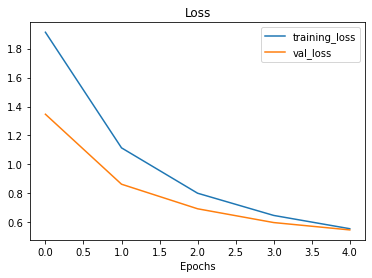

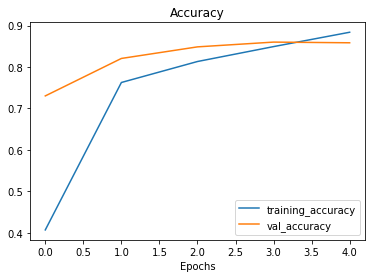

In [21]:
plot_loss_curves(history_0)

## Model_1

In [22]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-03-07 09:01:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  23.8MB/s    in 6.9s    

2023-03-07 09:01:16 (18.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [23]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [24]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Adding Data Augmentation into the model

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [46]:
# Data Augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

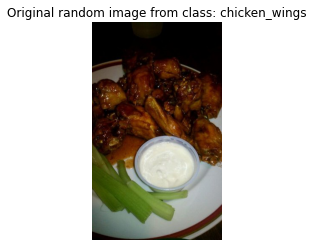

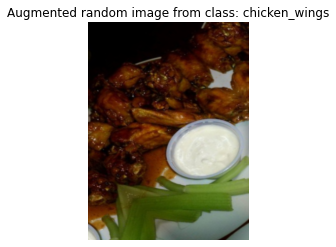

In [47]:
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);
     


#### Building the Model_1

In [48]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_trainable = False

# Input Layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Adding Augmentation Sequential Model as a layer
x = data_augmentation(inputs)

# Giving base model inputs
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Adding a dense layer as output
output = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Building the model with inputs and output
model_1 = keras.Model(inputs, output)

# Compiling the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=0.25*len(test_data),
                        callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_augmentation")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20230307-104329
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.1429

3/3 [==============================] - 54s 3s/step - loss: 0.5410 - accuracy: 0.1429 - val_loss: 0.4390 - val_accuracy: 0.1094
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 0.4732 - accuracy: 0.1286 - val_loss: 0.3376 - val_accuracy: 0.1719
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 0.3245 - accuracy: 0.2143 - val_loss: 0.3343 - val_accuracy: 0.1359
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 0.3200 - accuracy: 0.1714 - val_loss: 0.3160 - val_accuracy: 0.1797
Epoch 5/5
3/3 [==============================] - 8s 3s/step - loss: 0.2872 - accuracy: 0.3429 - val_loss: 0.3185 - val_accuracy: 0.1344


In [42]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 4,020,358
Non-tra

In [43]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug
     

79/79 [==============================] - 8s 92ms/step - loss: 0.3599 - accuracy: 0.1156


[0.359857976436615, 0.11559999734163284]

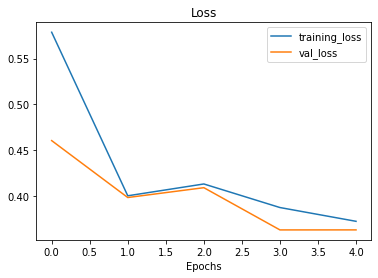

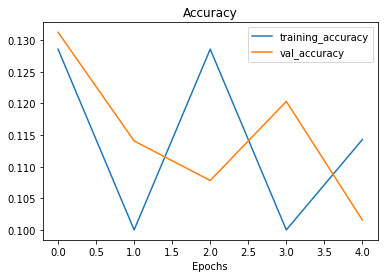

In [45]:
plot_loss_curves(history_1)
     

## Model_2 Feature extraction transfer learning with 10% of data and data augmentation

In [49]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [50]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [51]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

input_shape=(224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, output)

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [52]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)


In [54]:
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning","10_percent_data_aug"),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230307-110040
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.2373
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 613ms/step - loss: 0.4222 - accuracy: 0.2373 - val_loss: 0.2901 - val_accuracy: 0.5461
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.5960
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 462ms/step - loss: 0.2710 - accuracy: 0.5960 - val_loss: 0.2308 - val_accuracy: 0.7582
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.7067
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 511ms/step - loss: 0.2254 - accuracy: 0.7067 - val_loss: 0.1992 - val_accuracy: 0.7977
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.7360
Epoch

In [55]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 70ms/step - loss: 0.1624 - accuracy: 0.8292


[0.16235974431037903, 0.829200029373169]

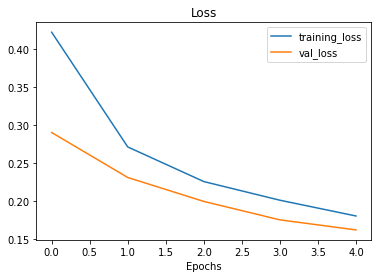

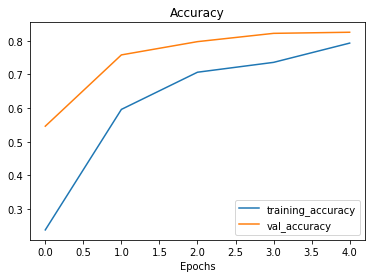

In [56]:
plot_loss_curves(history_2)

In [57]:
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.1624 - accuracy: 0.8292


In [58]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [60]:
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [61]:
print(np.array(results_10_percent_data_aug))
print(np.array(loaded_weights_model_results))

[0.16235974 0.82920003]
[0.16235971 0.82920003]


In [62]:
print(np.array(results_10_percent_data_aug)-np.array(loaded_weights_model_results))

[2.98023224e-08 0.00000000e+00]


## Model_3

In [63]:
model_2.layers

In [64]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [69]:
# layer3 i.e index 2 our base model 
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [66]:
print(model_2.layers[2])

In [84]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [78]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [79]:
print(len(model_2.trainable_variables))

12


In [82]:
fine_tune_epochs = initial_epochs + 5

history_3 = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        initial_epoch=history_2.epoch[-1],
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning","10_percent_fine_tuning_last_10_layers")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning_last_10_layers/20230307-113452


Epoch 5/10


24/24 [==============================] - 26s 568ms/step - loss: 0.7269 - accuracy: 0.7880 - val_loss: 0.5192 - val_accuracy: 0.8487
Epoch 6/10
24/24 [==============================] - 14s 515ms/step - loss: 0.5645 - accuracy: 0.8440 - val_loss: 0.4623 - val_accuracy: 0.8520
Epoch 7/10
24/24 [==============================] - 12s 503ms/step - loss: 0.4876 - accuracy: 0.8520 - val_loss: 0.4442 - val_accuracy: 0.8618
Epoch 8/10
24/24 [==============================] - 12s 472ms/step - loss: 0.4244 - accuracy: 0.8773 - val_loss: 0.4635 - val_accuracy: 0.8520
Epoch 9/10
24/24 [==============================] - 11s 454ms/step - loss: 0.3757 - accuracy: 0.8907 - val_loss: 0.3940 - val_accuracy: 0.8734
Epoch 10/10
24/24 [==============================] - 11s 446ms/step - loss: 0.3352 - accuracy: 0.9013 - val_loss: 0.4135 - val_accuracy: 0.8651


In [83]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 8s 90ms/step - loss: 0.4251 - accuracy: 0.8604


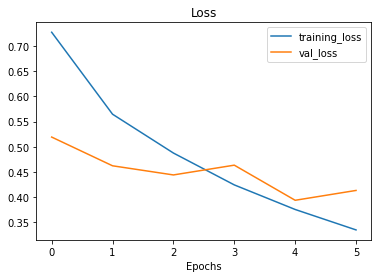

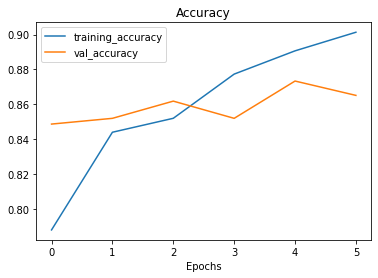

In [85]:
plot_loss_curves(history_3)

In [88]:
def compare_history(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.23733332753181458, 0.5960000157356262, 0.7066666483879089, 0.7360000014305115, 0.7933333516120911, 0.7879999876022339, 0.843999981880188, 0.8519999980926514, 0.8773333430290222, 0.890666663646698, 0.9013333320617676]


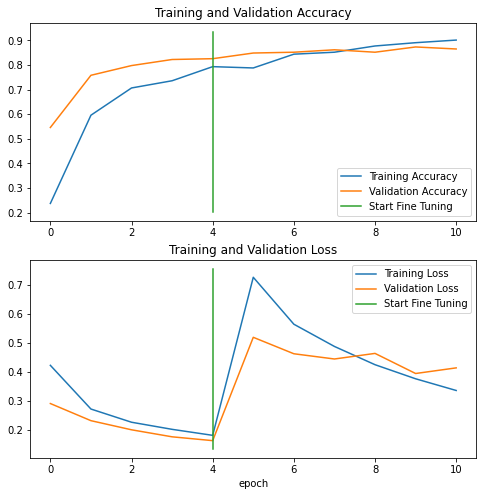

In [89]:
compare_history(original_history=history_2,
                new_history=history_3,
                initial_epochs=5)

## Model_4 : Fine Tuning with all of Data

In [90]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
     

--2023-03-07 11:51:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.1MB/s    in 23s     

2023-03-07 11:51:44 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [91]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [92]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [93]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path) # revert model back to saved weights

In [94]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 78ms/step - loss: 0.7053 - accuracy: 0.8292


[0.7053396105766296, 0.829200029373169]

In [95]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics=["accuracy"])
     

In [97]:
history_4 = model_2.fit(train_data_10_classes_full,
                        epochs=fine_tune_epochs,
                        initial_epoch=history_2.epoch[-1],
                        validation_data=test_data,
                        validation_steps=int(0.2*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning","full_10_classes_fine_tune_last_10_layers")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10_layers/20230307-120241


Epoch 5/10


235/235 [==============================] - 99s 365ms/step - loss: 0.6787 - accuracy: 0.7811 - val_loss: 0.3844 - val_accuracy: 0.8604
Epoch 6/10
235/235 [==============================] - 80s 337ms/step - loss: 0.5336 - accuracy: 0.8276 - val_loss: 0.3221 - val_accuracy: 0.8875
Epoch 7/10
235/235 [==============================] - 73s 311ms/step - loss: 0.4675 - accuracy: 0.8469 - val_loss: 0.3295 - val_accuracy: 0.8750
Epoch 8/10
235/235 [==============================] - 74s 311ms/step - loss: 0.4226 - accuracy: 0.8628 - val_loss: 0.2964 - val_accuracy: 0.9000
Epoch 9/10
235/235 [==============================] - 72s 306ms/step - loss: 0.3791 - accuracy: 0.8764 - val_loss: 0.3279 - val_accuracy: 0.8792
Epoch 10/10
235/235 [==============================] - 72s 302ms/step - loss: 0.3484 - accuracy: 0.8879 - val_loss: 0.2926 - val_accuracy: 0.9000


In [98]:

results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 78ms/step - loss: 0.2963 - accuracy: 0.8996


[0.29632890224456787, 0.8996000289916992]

5
11
[0.23733332753181458, 0.5960000157356262, 0.7066666483879089, 0.7360000014305115, 0.7933333516120911, 0.7810666561126709, 0.8276000022888184, 0.8469333052635193, 0.8628000020980835, 0.8763999938964844, 0.8878666758537292]


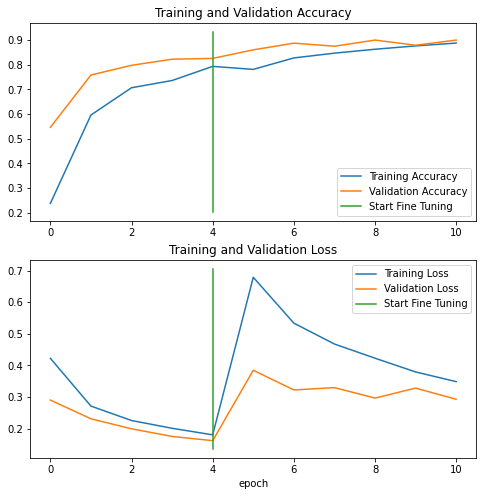

In [99]:
compare_history(history_2,history_4)